In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install scikit-learn
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv("/content/tatamotors_stockalltime.csv")
dataset.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-12-25,72.819626,72.819626,72.819626,72.819626,53.472778,0.0
1,1995-12-26,72.819626,72.819626,72.819626,72.819626,53.472778,0.0
2,1995-12-27,72.819626,72.819626,72.819626,72.819626,53.472778,0.0
3,1995-12-28,72.819626,72.819626,72.819626,72.819626,53.472778,0.0
4,1995-12-29,72.819626,72.819626,72.819626,72.819626,53.472778,0.0
5,1996-01-01,72.436363,72.819626,72.340553,72.819626,53.472778,40703.0
6,1996-01-02,72.819626,73.566986,72.053108,72.398041,53.163197,100975.0
7,1996-01-03,72.398041,72.819626,72.101013,72.158501,52.987293,29744.0
8,1996-01-04,72.158501,72.244736,71.190765,71.612350,52.586243,104889.0
9,1996-01-05,71.612350,71.823151,71.094955,71.353653,52.396282,62620.0


In [3]:
dataset = dataset.dropna()
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-12-25,72.819626,72.819626,72.819626,72.819626,53.472778,0.0
1,1995-12-26,72.819626,72.819626,72.819626,72.819626,53.472778,0.0
2,1995-12-27,72.819626,72.819626,72.819626,72.819626,53.472778,0.0
3,1995-12-28,72.819626,72.819626,72.819626,72.819626,53.472778,0.0
4,1995-12-29,72.819626,72.819626,72.819626,72.819626,53.472778,0.0


In [4]:
num_train = int(0.8*len(dataset['Close']))

data_train = dataset.iloc[:num_train]
data_test = dataset.iloc[num_train:]

training_set = dataset.iloc[:num_train, 4:5].values
test_set = dataset.iloc[num_train:, 4:5].values

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled = scaler.fit_transform(training_set)
training_set_scaled

array([[0.10488202],
       [0.10488202],
       [0.10488202],
       ...,
       [0.79273924],
       [0.79188726],
       [0.78805334]])

In [6]:
xtrain = []
ytrain = []

start = 50
end = len(training_set)

In [7]:
for i in range(start, end):
  xtrain.append(training_set_scaled[i-start:i, 0])
  ytrain.append(training_set_scaled[i, 0])

xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

In [8]:
xtrain.shape

(5318, 50)

In [9]:
ytrain.shape

(5318,)

In [10]:
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
xtrain.shape

(5318, 50, 1)

In [11]:
def create_model():
  inputs = keras.Input(shape=(xtrain.shape[1], 1))
  x = layers.LSTM(128, return_sequences=True)(inputs)
  x = layers.LSTM(64, return_sequences=True)(x)
  x = layers.LSTM(32)(x)
  x = layers.Dropout(0.2)(x)
  outputs = layers.Dense(1, activation='sigmoid')(x)
  model = keras.Model(inputs, outputs)
  return model


model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 50, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 50, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 128,417
Trainable params: 128,417
Non-trainable

In [12]:
model.compile(optimizer = keras.optimizers.RMSprop(), loss = 'mse', metrics='mae')

In [13]:
callbacks = [keras.callbacks.ModelCheckpoint("stock_1.keras", save_best_only=True, monitor='mae')]

In [14]:
history = model.fit(xtrain, ytrain, epochs=10, batch_size=16, callbacks=callbacks)

Epoch 1/10
333/333 [==============================] - 15s 20ms/step - loss: 0.0053 - mae: 0.0477
Epoch 2/10
333/333 [==============================] - 5s 16ms/step - loss: 0.0014 - mae: 0.0271
Epoch 3/10
333/333 [==============================] - 4s 11ms/step - loss: 0.0010 - mae: 0.0231
Epoch 4/10
333/333 [==============================] - 4s 11ms/step - loss: 8.2478e-04 - mae: 0.0212
Epoch 5/10
333/333 [==============================] - 4s 11ms/step - loss: 7.1011e-04 - mae: 0.0198
Epoch 6/10
333/333 [==============================] - 4s 11ms/step - loss: 6.2844e-04 - mae: 0.0185
Epoch 7/10
333/333 [==============================] - 4s 11ms/step - loss: 5.9019e-04 - mae: 0.0179
Epoch 8/10
333/333 [==============================] - 4s 11ms/step - loss: 5.3638e-04 - mae: 0.0171
Epoch 9/10
333/333 [==============================] - 4s 11ms/step - loss: 5.1443e-04 - mae: 0.0167
Epoch 10/10
333/333 [==============================] - 4s 11ms/step - loss: 4.9632e-04 - mae: 0.0164


In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
test_set_scaled = scaler.fit_transform(test_set)
test_set_scaled

xtest=[]
ytest=[]

for i in range(start, int(len(test_set))):
  xtest.append(test_set_scaled[i-start:i, 0])
  ytest.append(test_set[i, 0])


xtest = np.array(xtest)
ytest = np.array(ytest)

In [21]:
xtest.shape

(1292, 50)

In [22]:
ytest.shape

(1292,)

In [23]:
model = keras.models.load_model("stock_1.keras")
pred = model.predict(xtest)
pred = scaler.inverse_transform(pred)

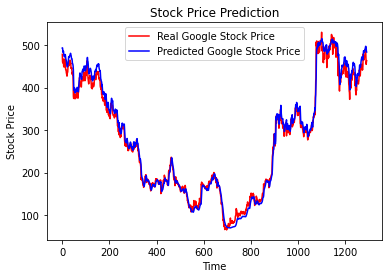

In [24]:
plt.plot(ytest, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()